In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [3]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

face-mask-12k-images-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip \*.zip && rm *.zip 

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tkinter as tk
from tkinter import filedialog

In [6]:
data_dir='/content/Face Mask Dataset/Train'
data_dir = pathlib.Path(data_dir)

In [7]:
batch_size = 16
img_height = 64
img_weight = 64

In [8]:
# reading training data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir , validation_split = 0.2 , subset = 'training', seed=123 , 
    image_size = (img_height,img_weight) , batch_size = batch_size
)
#reading validation data
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir , validation_split = 0.2 , subset = 'validation', seed=123 , 
    image_size = (img_height,img_weight) , batch_size = batch_size
)

class_names = train_ds.class_names

print(class_names)


Found 10000 files belonging to 2 classes.
Using 8000 files for training.
Found 10000 files belonging to 2 classes.
Using 2000 files for validation.
['WithMask', 'WithoutMask']


In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE #memory optimization
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 2

In [10]:
#Defining CNN
model = Sequential([
      layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_weight,3)),
      layers.Conv2D(16,3,padding='same',activation='relu'),
      layers.MaxPool2D() , 
      layers.Conv2D(32,3,padding='same',activation='relu'),
      layers.MaxPool2D(),
      layers.Conv2D(64,3,padding='same',activation='relu'),
      layers.MaxPool2D(),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(64,activation='relu'),
      layers.Dense(num_classes)
])

num_epochs=8
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
mymodel = model.fit(train_ds , validation_data = validation_ds, epochs=num_epochs)


acc= mymodel.history['accuracy']
val_acc = mymodel.history['val_accuracy']
loss = mymodel.history['loss']
val_loss = mymodel.history['val_loss']


Epoch 1/8
500/500 [==============================] - 44s 9ms/step - loss: 0.3071 - accuracy: 0.8217 - val_loss: 0.0368 - val_accuracy: 0.9900
Epoch 2/8
500/500 [==============================] - 2s 4ms/step - loss: 0.0693 - accuracy: 0.9760 - val_loss: 0.0566 - val_accuracy: 0.9785
Epoch 3/8
500/500 [==============================] - 2s 4ms/step - loss: 0.0441 - accuracy: 0.9833 - val_loss: 0.0290 - val_accuracy: 0.9915
Epoch 4/8
500/500 [==============================] - 2s 4ms/step - loss: 0.0314 - accuracy: 0.9879 - val_loss: 0.0367 - val_accuracy: 0.9890
Epoch 5/8
500/500 [==============================] - 2s 4ms/step - loss: 0.0346 - accuracy: 0.9864 - val_loss: 0.0486 - val_accuracy: 0.9835
Epoch 6/8
500/500 [==============================] - 2s 4ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0337 - val_accuracy: 0.9895
Epoch 7/8
500/500 [==============================] - 2s 4ms/step - loss: 0.0264 - accuracy: 0.9905 - val_loss: 0.0253 - val_accuracy: 0.9915
Epoch 8/8
50

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0

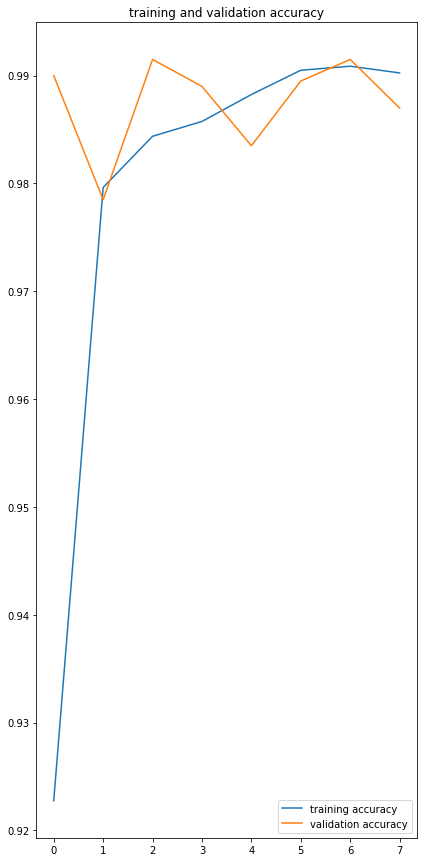

In [12]:
#graphes

epochs_range = range(num_epochs)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='training accuracy')
plt.plot(epochs_range,val_acc , label = 'validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')



plt.show()

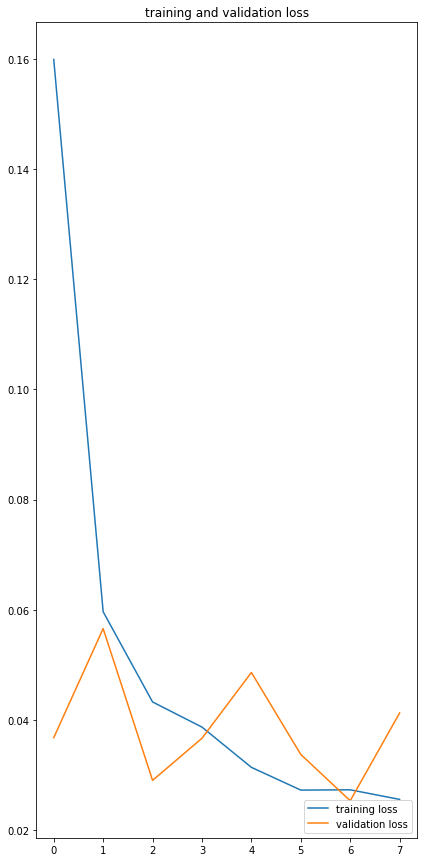

In [13]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.plot(epochs_range,loss,label='training loss')
plt.plot(epochs_range,val_loss , label = 'validation loss')
plt.legend(loc='lower right')
plt.title('training and validation loss')
plt.show()